# What is Parkinson’s Disease?
> ### Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year in India. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.

![](https://www.drprempillay.org/wp-content/uploads/2015/08/ParkinsonsDisease.png)

# **Symptoms:**

**Tremor:** A tremor, or shaking, usually begins in a limb, often your hand or fingers. You may rub your thumb and forefinger back and forth, 
known as a pill-rolling tremor. Your hand may tremble when it's at rest.

**Slowed movement (bradykinesia):** Over time, Parkinson's disease may slow your movement, making simple tasks difficult and time-consuming. 
Your steps may become shorter when you walk. It may be difficult to get out of a chair. You may drag your feet as you try to walk.


**Rigid muscles:** Muscle stiffness may occur in any part of your body. The stiff muscles can be painful and limit your range of motion.
Impaired posture and balance. Your posture may become stooped, or you may have balance problems as a result of Parkinson's disease.

**Loss of automatic movements:** You may have a decreased ability to perform unconscious movements, including blinking, smiling or swinging your arms when you walk.


**Speech changes:** You may speak softly, quickly, slur or hesitate before talking. Your speech may be more of a monotone rather than have the usual inflections.


**Writing changes:** It may become hard to write, and your writing may appear sm

# **Importing dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving parkinsons.data to parkinsons.data


# Importing necessary library

In [ ]:
# Make necessary imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Loading the dataset using pandas

In [ ]:
data=pd.read_csv("parkinsons.data")

# Exploring the dataset

In [ ]:
# using .columns we get the column names of the dataset

data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
# using .shape we get to know about the number of rows and columns present in the dataset

data.shape

(195, 24)

In [6]:
# displaying the first 5 rows from the dataset

data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
# displaying the last 5 rows from the dataset

data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [8]:
# displaying the dataset of the columns in the dataset

data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

# Checking for null values

In [9]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Since we dont have any null values we dont need to preprocess it as of now, we can move to EDA.

# EDA (Exploratory data analysis)

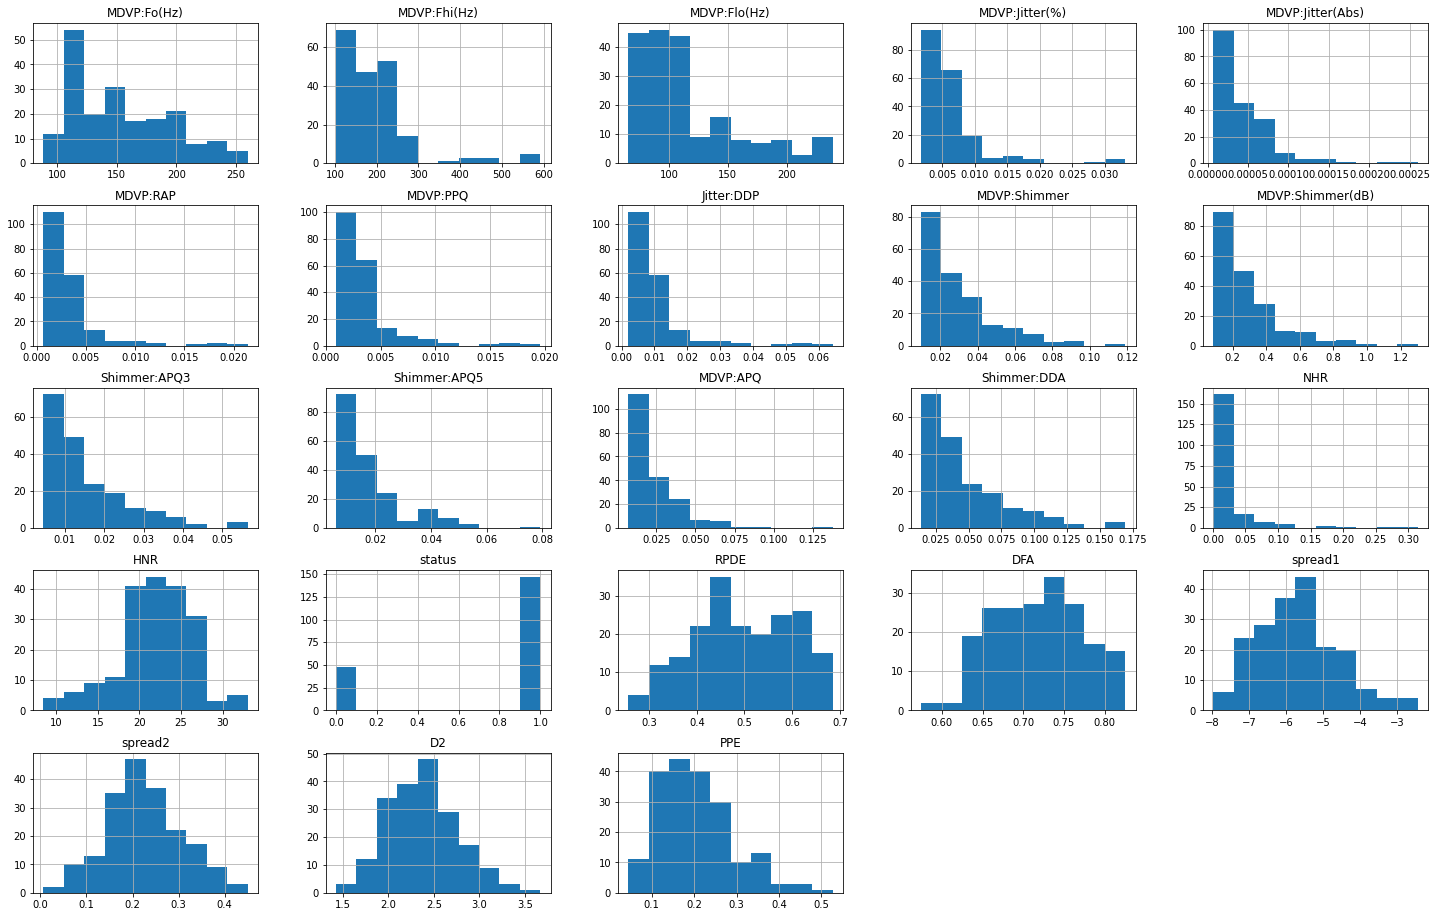

In [16]:
# Plotting the histogram of dataset

data.hist(figsize=(25,16))
plt.show()

In [11]:
# Now we will find correlation and plot it using heatmap

data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


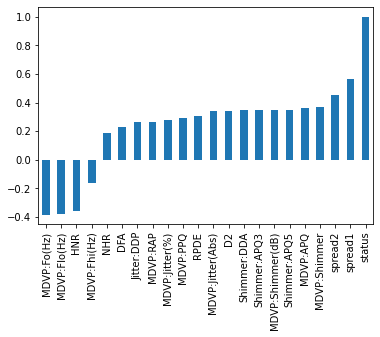

In [12]:
data.corr()['status'][:-1].sort_values().plot(kind='bar')
plt.show()

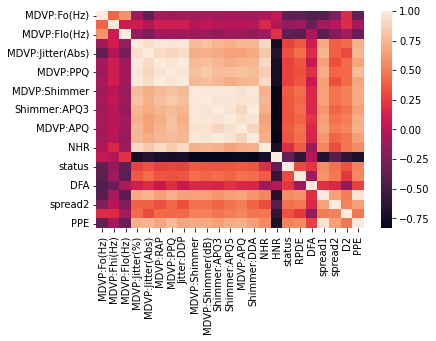

In [13]:
sns.heatmap(data.corr())
plt.show()

# Get the features and labels from the DataFrame (dataset). The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.

In [17]:
features=data.loc[:,data.columns!='status'].values[:,1:]
labels=data.loc[:,'status'].values

# The ‘status’ column has values 0 and 1 as labels; let’s get the counts of these labels for both- 0 and 1.

In [18]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


We have 147 ones and 48 zeros in the status column in our dataset.

Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. The MinMaxScaler transforms features by scaling them to a given range. The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels.

In [19]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

# Now, split the dataset into training and testing sets keeping 20% of the data for testing.

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2)

# Building the XGBoost Model

 Initialize an XGBClassifier and train the model. This classifies using eXtreme Gradient Boosting- using gradient boosting algorithms for modern data science problems. It falls under the category of Ensemble Learning in ML, where we train and predict using many models to produce one superior output.

In [21]:
model = XGBClassifier(learning_rate=0.1, max_depth=20,verbosity=2,random_state=42,
                    scale_pos_weight=1.5, eval_metric='mlogloss',use_label_encoder =False)

In [23]:
model.fit(x_train, y_train)

[14:15:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[14:15:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:15:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[14:15:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[14:15:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[14:15:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[14:15:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[14:15:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nod

XGBClassifier(eval_metric='mlogloss', max_depth=20, random_state=42,
              scale_pos_weight=1.5, use_label_encoder=False, verbosity=2)

In [24]:
# Finally, generate y_pred (predicted values for x_test)

y_pred=model.predict(x_test)

In [25]:
# Calculate the accuracy for the model. Print it out.

print(accuracy_score(y_test, y_pred))

# 92.3076923076923 -with MinMaxscalar

0.9230769230769231


# Prediction using custom values

In [38]:
# we took random values for this prediction, we can play with values to see the different output

newinput=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,
           1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728,2.657476,0.133050]]

In [39]:
# Here we will use our model to predict the output based on new values 

output=model.predict(newinput)
output

array([1])

In [40]:
# label 1 means True
# label 0 means False


if output == 1:
    print(True)
else:
    print(False)

True
